# Global Analysis and Data Visualization of COVID-19

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.available
import seaborn as sns
%matplotlib inline
import folium
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error

# interactive visualization
import plotly.express as px
import plotly.graph_objs as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [2]:
# read data from Johns Hopkins github repo
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
# shape of dataframe
print(confirmed_df.shape)
print(deaths_df.shape)
print(recoveries_df.shape)

(269, 310)
(269, 310)
(256, 310)


In [4]:
# first 5 rows
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,42969,43035,43240,43403,43628,43851,44228,44443,44503,44706
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493


In [6]:
# checking null values
confirmed_df.isnull().sum()

Province/State    188
Country/Region      0
Lat                 0
Long                0
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             0
                 ... 
10/24/20            0
10/25/20            0
10/26/20            0
10/27/20            0
10/28/20            0
10/29/20            0
10/30/20            0
10/31/20            0
11/1/20             0
11/2/20             0
11/3/20             0
11/4/20             0
11/5/20             0
11/6/20             0
11/7/20   

In [7]:
# check all unique values
confirmed_df.nunique()

Province/State     81
Country/Region    191
Lat               265
Long              266
1/22/20            11
1/23/20            15
1/24/20            19
1/25/20            28
1/26/20            29
1/27/20            33
1/28/20            36
1/29/20            37
1/30/20            40
1/31/20            41
2/1/20             44
2/2/20             43
2/3/20             43
2/4/20             45
2/5/20             46
2/6/20             45
2/7/20             44
2/8/20             47
2/9/20             47
2/10/20            46
2/11/20            48
2/12/20            46
2/13/20            48
2/14/20            46
2/15/20            46
2/16/20            48
                 ... 
10/24/20          257
10/25/20          258
10/26/20          257
10/27/20          260
10/28/20          263
10/29/20          259
10/30/20          261
10/31/20          259
11/1/20           257
11/2/20           260
11/3/20           261
11/4/20           258
11/5/20           261
11/6/20           260
11/7/20   

In [8]:
# check all unique values
recoveries_df.nunique()

Province/State     67
Country/Region    191
Lat               255
Long              255
1/22/20             2
1/23/20             3
1/24/20             4
1/25/20             4
1/26/20             4
1/27/20             6
1/28/20             7
1/29/20             7
1/30/20             7
1/31/20            10
2/1/20             12
2/2/20             16
2/3/20             18
2/4/20             18
2/5/20             20
2/6/20             24
2/7/20             28
2/8/20             31
2/9/20             29
2/10/20            28
2/11/20            32
2/12/20            34
2/13/20            35
2/14/20            37
2/15/20            38
2/16/20            40
                 ... 
10/24/20          246
10/25/20          244
10/26/20          244
10/27/20          244
10/28/20          245
10/29/20          241
10/30/20          243
10/31/20          240
11/1/20           242
11/2/20           243
11/3/20           245
11/4/20           246
11/5/20           247
11/6/20           245
11/7/20   

In [9]:
# value counts by country
confirmed_df['Country/Region'].value_counts()

China                       33
Canada                      14
France                      11
United Kingdom              11
Australia                    8
Netherlands                  5
Denmark                      3
Trinidad and Tobago          1
Marshall Islands             1
Syria                        1
Andorra                      1
MS Zaandam                   1
Uzbekistan                   1
Vanuatu                      1
Belgium                      1
Liechtenstein                1
Egypt                        1
Bolivia                      1
Maldives                     1
Germany                      1
Antigua and Barbuda          1
Bahamas                      1
Honduras                     1
Switzerland                  1
Singapore                    1
Burundi                      1
Afghanistan                  1
Niger                        1
Norway                       1
Gambia                       1
                            ..
Sudan                        1
Panama  

# Cleaning :

### 1) Rename columns 'Province/State' & 'Country/Region' & change latest date to 'Current'.  

In [10]:
col=confirmed_df.columns[-1]

confirmed_df.rename(columns = {'Province/State' : 'Province', 'Country/Region' : 'Country', col : 'Current'},inplace = True)
deaths_df.rename(columns = {'Province/State' : 'Province', 'Country/Region' : 'Country', col : 'Current'},inplace = True)
recoveries_df.rename(columns = {'Province/State' : 'Province', 'Country/Region' : 'Country', col : 'Current'},inplace = True)
confirmed_df.head(1)

,Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,Current
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,42969,43035,43240,43403,43628,43851,44228,44443,44503,44706


### 2) Make new dataframe grouping by unique country

In [12]:
# confirmed cases
confirm = pd.DataFrame(confirmed_df.groupby('Country').sum())
confirm.reset_index(inplace = True)
confirm.head(10)

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,Current
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,...,42969,43035,43240,43403,43628,43851,44228,44443,44503,44706
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,...,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,...,65975,66819,67679,68589,69591,70629,71652,72755,73774,74862
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,...,5725,5725,5872,5914,5951,6018,6066,6142,6207,6256
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,...,13228,13374,13451,13615,13818,13922,14134,14267,14413,14493
5,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,...,133,134,134,134,134,139,139,139,139,139
6,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,...,1296378,1304846,1310491,1318384,1329005,1339337,1349434,1359042,1366182,1370366
7,Armenia,40.06910,45.038200,0,0,0,0,0,0,0,...,114383,115855,117337,117886,118870,120459,121979,123646,124839,126224
8,Australia,-256.85020,1130.843900,0,0,0,0,4,5,5,...,27682,27711,27749,27758,27777,27785,27792,27806,27821,27834
9,Austria,47.51620,14.550100,0,0,0,0,0,0,0,...,191228,198291,203956,208613,214597,221688,228683,235351,241962,247188


In [13]:
# drop Lat & Long columns as they do not give accurate results
col = confirm['Country']
confirm.drop(['Lat','Long'],axis=1,inplace=True)
confirm.head(2)

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,Current
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,42969,43035,43240,43403,43628,43851,44228,44443,44503,44706
1,Albania,0,0,0,0,0,0,0,0,0,...,26701,27233,27830,28432,29126,29837,30623,31459,32196,32761


In [14]:
# deaths
deaths= pd.DataFrame(deaths_df.groupby('Country').sum())
deaths.reset_index(inplace = True)

# drop Lat & Long columns as they do not give accurate results
deaths.drop(['Lat','Long'],axis=1,inplace=True)
deaths.head(2)

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,Current
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1595,1605,1617,1626,1638,1645,1650,1661,1675,1687
1,Albania,0,0,0,0,0,0,0,0,0,...,605,612,623,631,637,646,657,672,685,699


In [15]:
# recovery
recovery= pd.DataFrame(recoveries_df.groupby('Country').sum())
recovery.reset_index(inplace = True)

# drop Lat & Long columns as they do not give accurate results
recovery.drop(['Lat','Long'],axis=1,inplace=True)
recovery.head(2)

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,Current
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,35036,35067,35092,35137,35160,35295,35350,35370,35422,35934
1,Albania,0,0,0,0,0,0,0,0,0,...,12667,12767,12889,13453,13804,14216,14565,15055,15469,15842


### 3) Create new dataframe for active cases

In [16]:
# active cases dataframe
active= confirm.copy()
for i in active.columns[1:]:
    active[i] =active[i] - recovery[i] - deaths[i]
active.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,Current
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,6338,6363,6531,6640,6830,6911,7228,7412,7406,7085
1,Albania,0,0,0,0,0,0,0,0,0,...,13429,13854,14318,14348,14685,14975,15401,15732,16042,16220
2,Algeria,0,0,0,0,0,0,0,0,0,...,20072,20481,20892,21273,22257,22097,22466,22938,23336,23796
3,Andorra,0,0,0,0,0,0,0,0,0,...,975,975,1049,1008,910,887,863,827,841,822
4,Angola,0,0,0,0,0,0,0,0,0,...,6585,6707,6685,6768,6908,6967,6739,6816,6804,6810


# Analysis :

### 1) Total Cases till date

In [17]:
print("Confirmed Cases :" , confirm.iloc[:,-1].sum())
print("Recovered Cases :" , recovery.iloc[:,-1].sum())
print("Deaths :" , deaths.iloc[:,-1].sum())
print("Active Cases :", active.iloc[:,-1].sum())

Confirmed Cases : 58649324
Recovered Cases : 37486362
Deaths : 1388068
Active Cases : 19774894


### 2) Top 10 countries

In [18]:
confirm_data = confirm[['Country','Current']].sort_values('Current',ascending = False)
deaths_data = deaths[['Country','Current']].sort_values('Current',ascending = False)
recovery_data = recovery[['Country','Current']].sort_values('Current',ascending = False)
active_data = active[['Country','Current']].sort_values('Current',ascending = False)

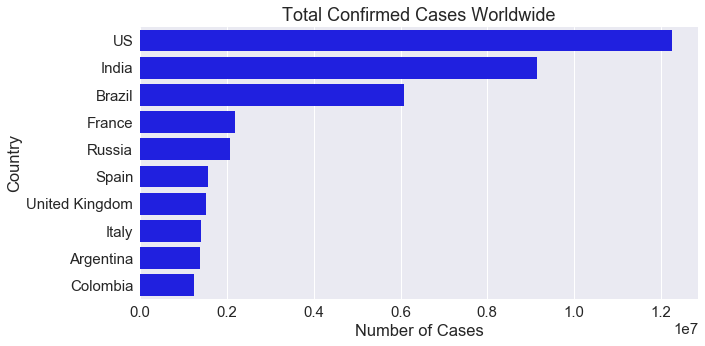

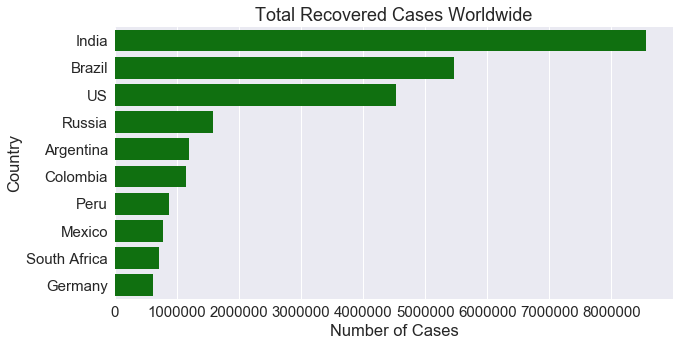

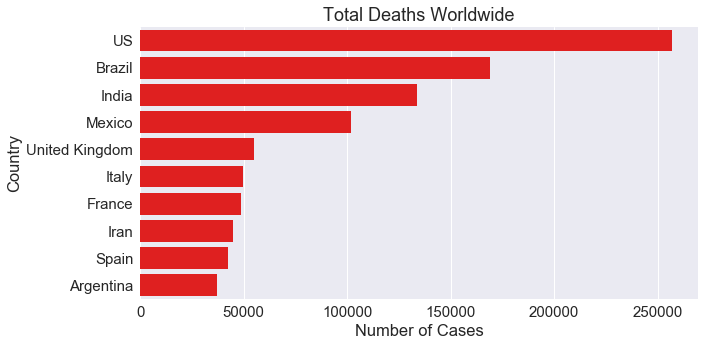

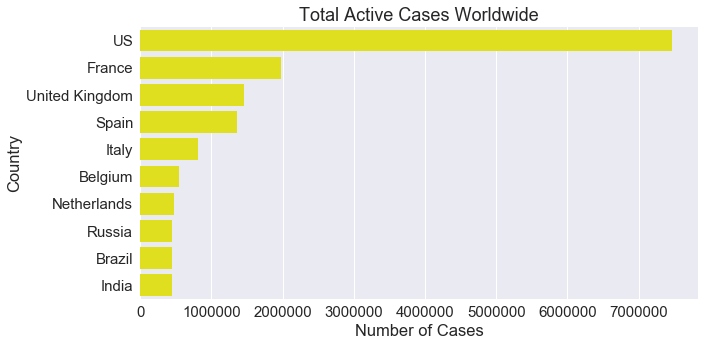

In [19]:
# Confirmed Cases
sns.set(font_scale=1.5)
plt.figure(figsize=(10,5))
fig= sns.barplot(x='Current', y='Country', data=confirm_data[:10], orient='h',color='Blue')
plt.title('Total Confirmed Cases Worldwide')
fig.set(xlabel ='Number of Cases', ylabel ='Country')
plt.show()

# Recovery Cases
plt.figure(figsize=(10,5))
fig= sns.barplot(x='Current', y='Country', data=recovery_data[:10], orient='h',color='Green')
plt.title('Total Recovered Cases Worldwide')
fig.set(xlabel ='Number of Cases', ylabel ='Country')
plt.show()

# Death Cases
plt.figure(figsize=(10,5))
fig= sns.barplot(x='Current', y='Country', data=deaths_data[:10], orient='h',color='Red')
plt.title('Total Deaths Worldwide')
fig.set(xlabel ='Number of Cases', ylabel ='Country')
plt.show()

# Active Cases
plt.figure(figsize=(10,5))
fig= sns.barplot(x='Current', y='Country', data=active_data[:10], orient='h',color='Yellow')
plt.title('Total Active Cases Worldwide')
fig.set(xlabel ='Number of Cases', ylabel ='Country')
plt.show()

### 3) Daily Cases for China, Italy, US, Russia, India, Brazil

In [20]:
china_confirm = confirm[confirm.Country == 'China'].iloc[:,1:].sum().values.tolist()
us_confirm = confirm[confirm.Country == 'US'].iloc[:,1:].sum().values.tolist()
italy_confirm = confirm[confirm.Country == 'Italy'].iloc[:,1:].sum().values.tolist()
india_confirm = confirm[confirm.Country == 'India'].iloc[:,1:].sum().values.tolist()
russia_confirm = confirm[confirm.Country == 'Russia'].iloc[:,1:].sum().values.tolist()
brazil_confirm = confirm[confirm.Country == 'Brazil'].iloc[:,1:].sum().values.tolist()

china_deaths = deaths[deaths.Country == 'China'].iloc[:,1:].sum().values.tolist()
us_deaths = deaths[deaths.Country == 'US'].iloc[:,1:].sum().values.tolist()
italy_deaths = deaths[deaths.Country == 'Italy'].iloc[:,1:].sum().values.tolist()
india_deaths = deaths[deaths.Country == 'India'].iloc[:,1:].sum().values.tolist()
russia_deaths = deaths[deaths.Country == 'Russia'].iloc[:,1:].sum().values.tolist()
brazil_deaths = deaths[confirm.Country == 'Brazil'].iloc[:,1:].sum().values.tolist()

china_recovery = recovery[recovery.Country == 'China'].iloc[:,1:].sum().values.tolist()
us_recovery = recovery[recovery.Country == 'US'].iloc[:,1:].sum().values.tolist()
italy_recovery = recovery[recovery.Country == 'Italy'].iloc[:,1:].sum().values.tolist()
india_recovery = recovery[recovery.Country == 'India'].iloc[:,1:].sum().values.tolist()
russia_recovery = recovery[recovery.Country == 'Russia'].iloc[:,1:].sum().values.tolist()
brazil_recovery = recovery[recovery.Country == 'Brazil'].iloc[:,1:].sum().values.tolist()

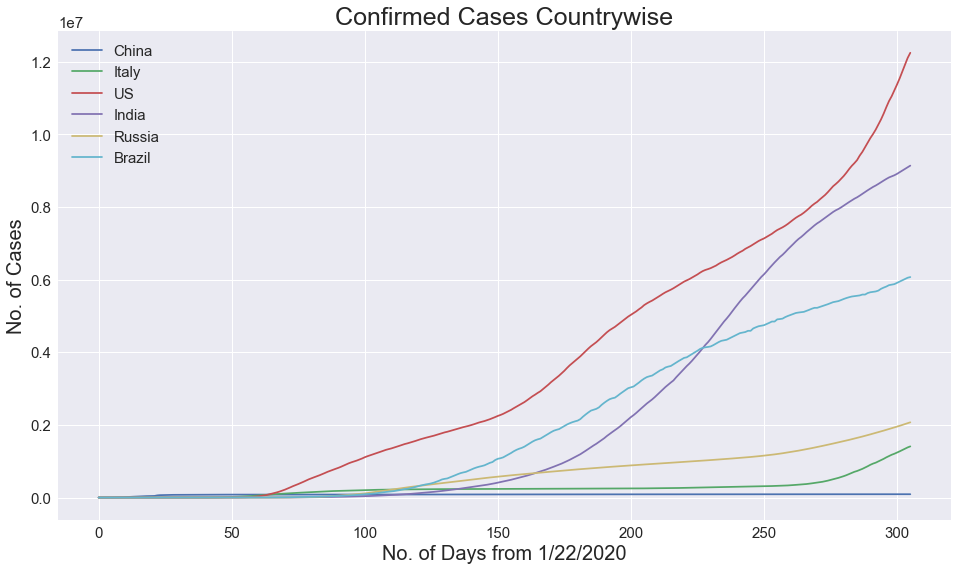

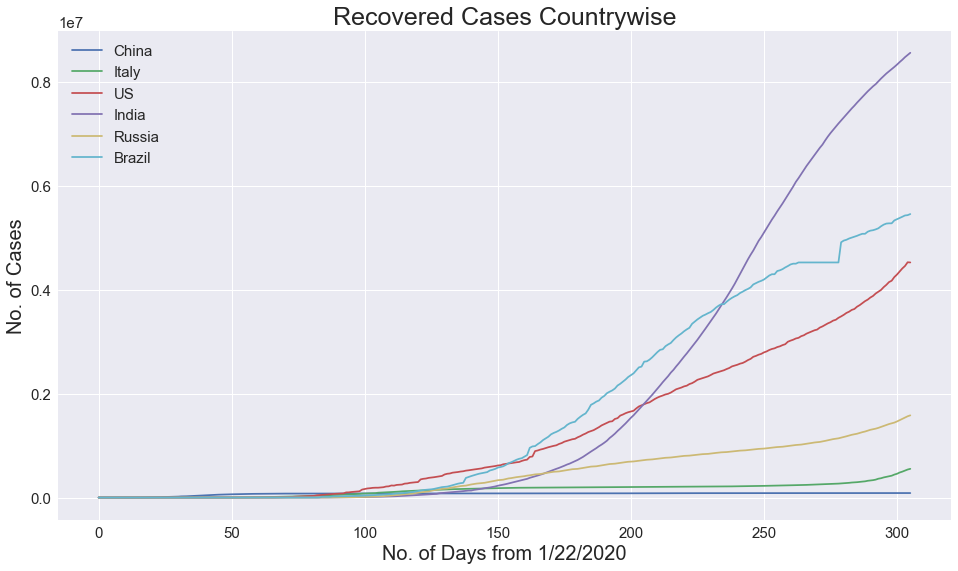

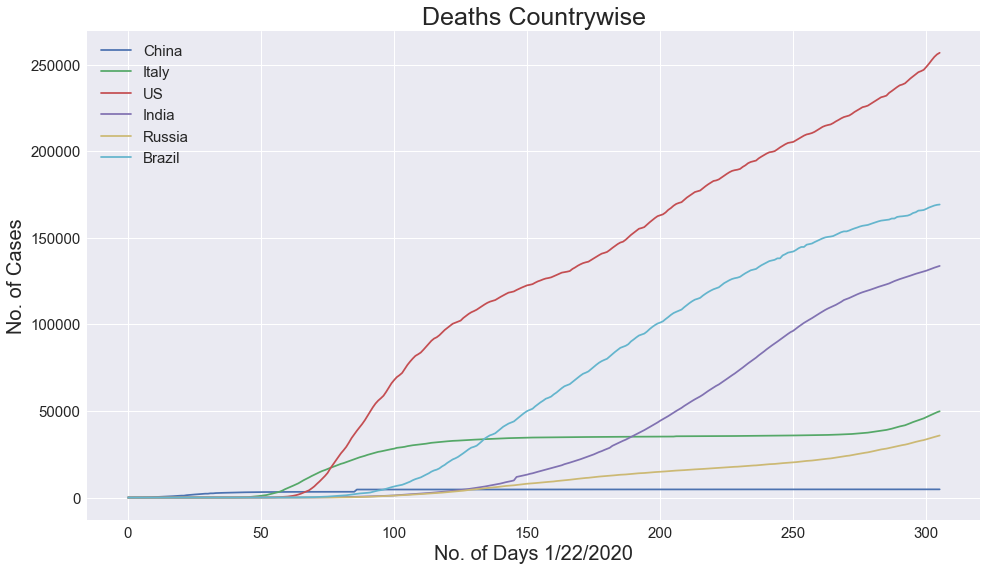

In [21]:
# Confirmed Cases
plt.figure(figsize=(16,9))
plt.plot(china_confirm)
plt.plot(italy_confirm)
plt.plot(us_confirm)
plt.plot(india_confirm)
plt.plot(russia_confirm)
plt.plot(brazil_confirm)

plt.title('Confirmed Cases Countrywise', size=25)
plt.xlabel('No. of Days from 1/22/2020', size=20)
plt.ylabel('No. of Cases', size=20)
plt.legend(['China', 'Italy','US','India','Russia','Brazil'])
plt.show()

# Recovered Cases
plt.figure(figsize=(16, 9))
plt.plot(china_recovery)
plt.plot(italy_recovery)
plt.plot(us_recovery)
plt.plot(india_recovery)
plt.plot(russia_recovery)
plt.plot(brazil_recovery)

plt.title('Recovered Cases Countrywise', size=25)
plt.xlabel('No. of Days from 1/22/2020', size=20)
plt.ylabel('No. of Cases', size=20)
plt.legend(['China', 'Italy','US','India','Russia','Brazil'])
plt.show()

# Deaths
plt.figure(figsize=(16, 9))
plt.plot(china_deaths)
plt.plot(italy_deaths)
plt.plot(us_deaths)
plt.plot(india_deaths)
plt.plot(russia_deaths)
plt.plot(brazil_deaths)

plt.title('Deaths Countrywise', size=25)
plt.xlabel('No. of Days 1/22/2020', size=20)
plt.ylabel('No. of Cases', size=20)
plt.legend(['China', 'Italy','US','India','Russia','Brazil'])
plt.show()

### Observations :   
* Although COVID-19originated from China, the number of cases are very less compared to other countries.
* Number of cases and deaths in USA has been increasing exponentially.    
* Initially the cases and deaths in Italy were increasing but currently the situation seems under control.     
* Number of cases and deaths are comparatively less in India.

### 4) Increase in Cases Worldwide from 22/1/20

In [22]:
confirm_date = confirm.iloc[:,1:].sum().values.tolist()
recovery_date = recovery.iloc[:,1:].sum().values.tolist()
deaths_date = deaths.iloc[:,1:].sum().values.tolist()
active_date = active.iloc[:,1:].sum().values.tolist()

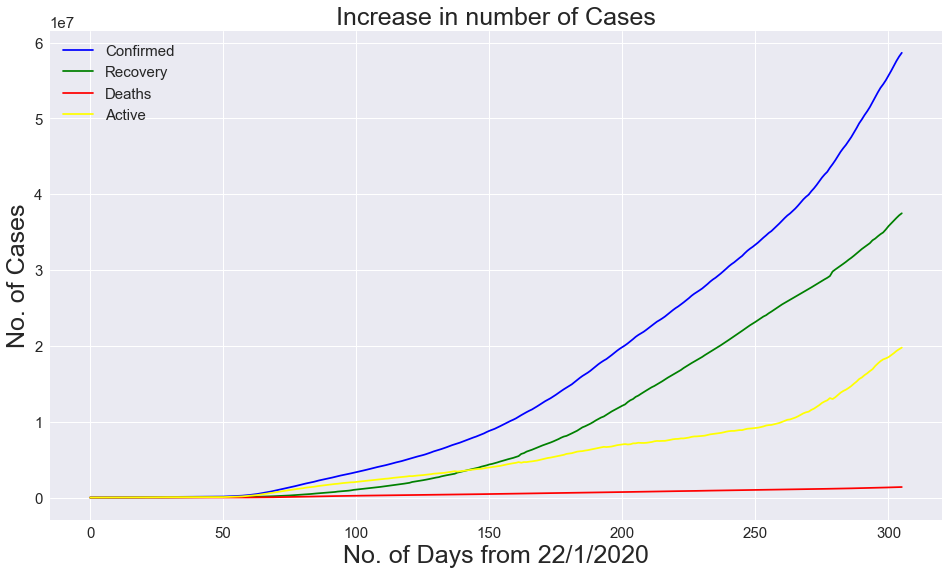

In [23]:
plt.figure(figsize=(16,9))
plt.plot(confirm_date,color='Blue')
plt.plot(recovery_date,color='Green')
plt.plot(deaths_date,color='Red')
plt.plot(active_date,color='Yellow')

plt.xlabel('No. of Days from 22/1/2020',size=25)
plt.ylabel('No. of Cases',size=25)
plt.title('Increase in number of Cases',size=25)
plt.legend(['Confirmed','Recovery','Deaths','Active'])
plt.show()

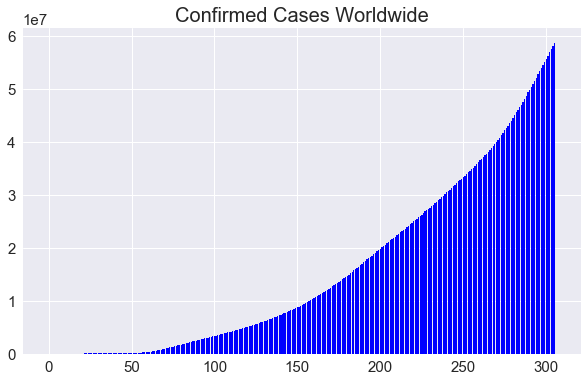

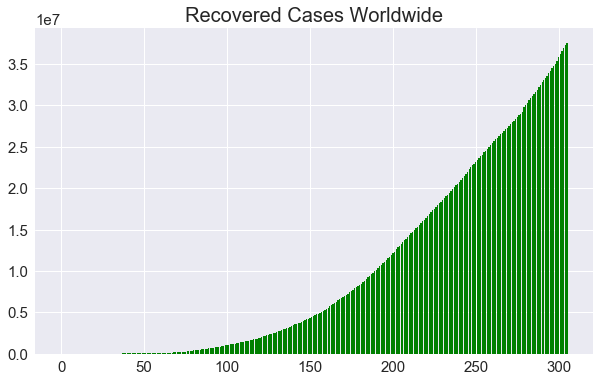

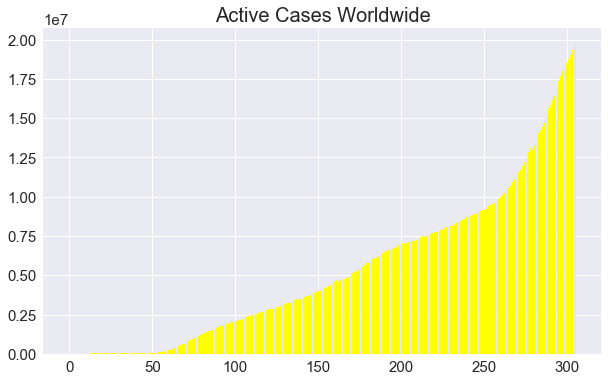

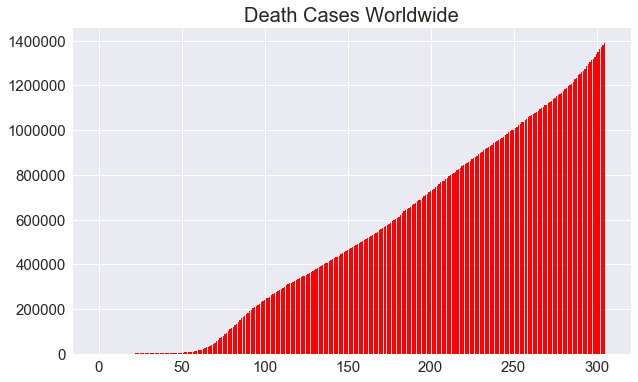

In [24]:
days = [ i for i in range(confirm.shape[1] - 1) ] 

plt.figure(figsize=(10,6))
plt.bar(days,confirm_date,color='Blue')
plt.title('Confirmed Cases Worldwide',size=20)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(days,recovery_date,color='Green')
plt.title('Recovered Cases Worldwide',size=20)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(days,active_date,color='Yellow')
plt.title('Active Cases Worldwide',size=20)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(days,deaths_date,color='Red')
plt.title('Death Cases Worldwide',size=20)
plt.show()

### Observations :
* A sharp rise in number of confirmed cases can be seen after 2 months of origin of coronavirus.   
* The number of deaths are comparatively very less compared to the confirmed cases.    
* The number of active cases are more compared to recovered cases.

# Linear Regression :

In [25]:
total_confirm = np.array(confirm_date).reshape(-1,1)
total_deaths = np.array(deaths_date).reshape(-1,1)
total_recovery = np.array(recovery_date).reshape(-1,1)
total_active = np.array(active_date).reshape(-1,1)
dates = np.array([i for i in range(len(days))]).reshape(-1, 1)

In [26]:
# Visualization function
def linear_plot(x,y,reg,title):
    plt.figure(figsize=(10,6)) 
    plt.scatter(x,y,color='red')
    plt.plot(x,reg)
    plt.title(title)

In [27]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(dates[50:], total_confirm[50:], test_size=0.14, shuffle=False) 

In [28]:
reg = LinearRegression()
reg.fit(X_train_confirmed, y_train_confirmed);

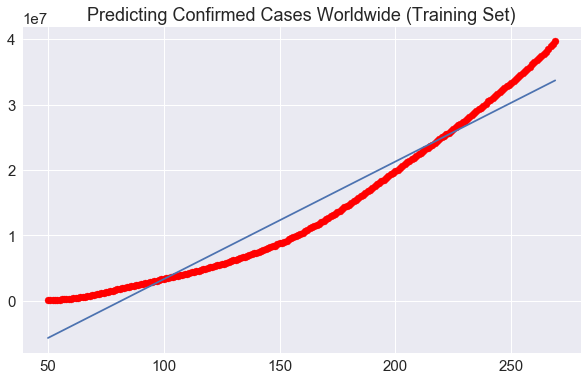

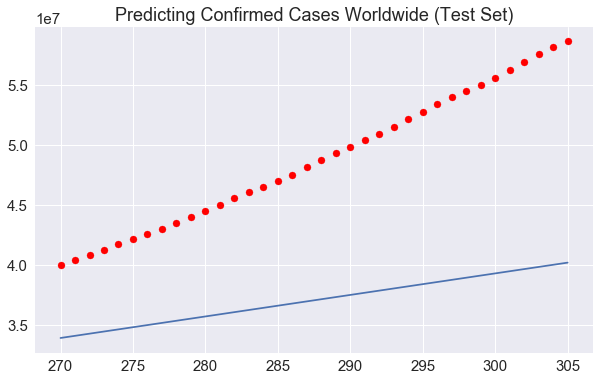

In [29]:
# Plot training set
linear_plot(X_train_confirmed,y_train_confirmed,reg.predict(X_train_confirmed),'Predicting Confirmed Cases Worldwide (Training Set)')

# Plot test set
linear_plot(X_test_confirmed,y_test_confirmed,reg.predict(X_test_confirmed),'Predicting Confirmed Cases Worldwide (Test Set)')


The test set predictions are not very accurate as training set predictions.      
As the total confirmed cases has a parabolic curve, trying polynomial linear regression.

# Polynomial Linear Regression 

### Confirmed Cases

In [30]:
 # transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)

In [31]:
# polynomial regression
poly_reg = LinearRegression(normalize=True, fit_intercept=False)
poly_reg.fit(poly_X_train_confirmed, y_train_confirmed)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

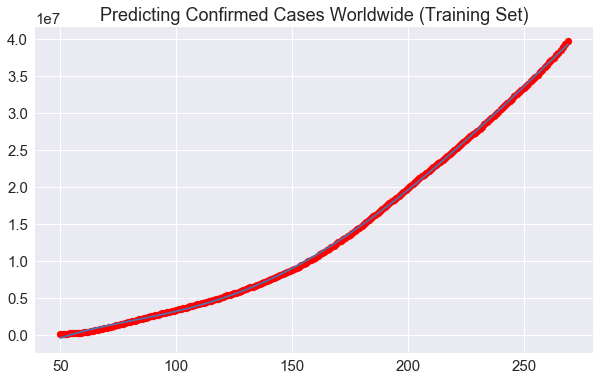

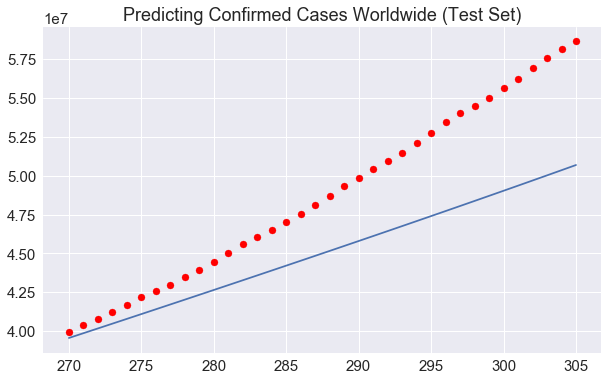

In [32]:
# Plot training set
linear_plot(X_train_confirmed,y_train_confirmed,poly_reg.predict(poly_X_train_confirmed),'Predicting Confirmed Cases Worldwide (Training Set)')

# Plot test set
linear_plot(X_test_confirmed,y_test_confirmed,poly_reg.predict(poly_X_test_confirmed),'Predicting Confirmed Cases Worldwide (Test Set)')

The test set curve shows much better prediction.

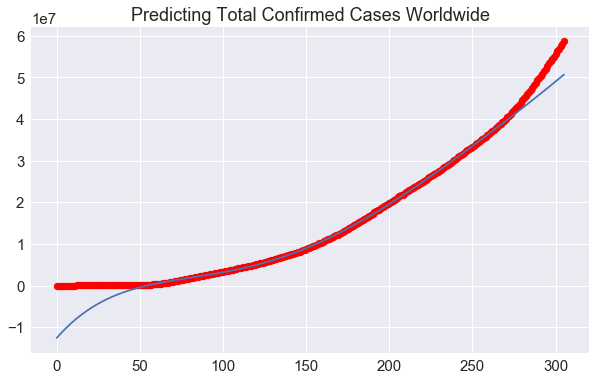

In [33]:
# Plot total cases
linear_plot(dates,total_confirm,poly_reg.predict(poly.fit_transform(dates)),'Predicting Total Confirmed Cases Worldwide')

### Death Cases

In [34]:
X_train_deaths, X_test_deaths, y_train_deaths, y_test_deaths = train_test_split(dates[60:], total_deaths[60:], test_size=0.14, shuffle=False) 

In [35]:
 # transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_deaths = poly.fit_transform(X_train_deaths)
poly_X_test_deaths = poly.fit_transform(X_test_deaths)

# polynomial regression
poly_reg = LinearRegression(normalize=True, fit_intercept=False)
poly_reg.fit(poly_X_train_deaths, y_train_deaths)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

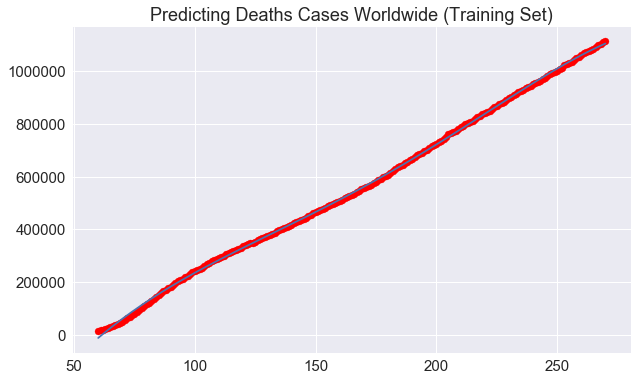

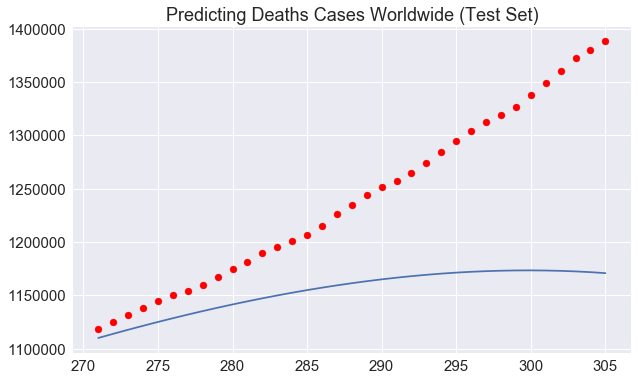

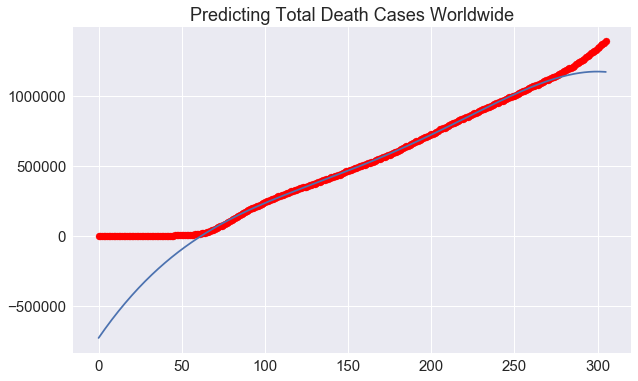

In [36]:
# Plot training set
linear_plot(X_train_deaths,y_train_deaths,poly_reg.predict(poly_X_train_deaths),'Predicting Deaths Cases Worldwide (Training Set)')

# Plot test set
linear_plot(X_test_deaths,y_test_deaths,poly_reg.predict(poly_X_test_deaths),'Predicting Deaths Cases Worldwide (Test Set)')

# Plot total cases
linear_plot(dates,total_deaths,poly_reg.predict(poly.fit_transform(dates)),'Predicting Total Death Cases Worldwide')

In [37]:
# Confirmed Cases
fig = px.choropleth(confirm_data, locations="Country", locationmode='country names', 
                  color=confirm_data['Current'], hover_name="Country", 
                  title='Countries with Confirmed Cases',hover_data=['Current'], color_continuous_scale="blues")
fig.show()

# Recovered Cases
fig = px.choropleth(recovery_data, locations="Country", locationmode='country names', 
                  color=recovery_data['Current'], hover_name="Country", 
                  title='Countries with Recovered Cases',hover_data=['Current'], color_continuous_scale="emrld")
fig.show()

# Death Cases
fig = px.choropleth(deaths_data, locations="Country", locationmode='country names', 
                  color=deaths_data['Current'], hover_name="Country", 
                  title='Countries with Death Cases',hover_data=['Current'], color_continuous_scale="peach")
fig.show()

# Active Cases
fig = px.choropleth(active_data, locations="Country", locationmode='country names', 
                  color=active_data['Current'], hover_name="Country", 
                  title='Countries with Active Cases',hover_data=['Current'], color_continuous_scale="ylgn")
fig.show()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [38]:
# Recovered Cases
fig = px.choropleth(recovery_data, locations="Country", locationmode='country names', 
                  color=recovery_data['Current'], hover_name="Country", 
                  hover_data=['Current'], color_continuous_scale="emrld")
fig.show()

In [39]:
# Death Cases
fig = px.choropleth(deaths_data, locations="Country", locationmode='country names', 
                  color=deaths_data['Current'], hover_name="Country", 
                  hover_data=['Current'], color_continuous_scale="peach")
fig.show()
